In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
da = xr.open_dataset('hd387783.nc')

In [3]:
num = np.arange(0,da.alk.shape[0])
da = da.expand_dims({'num':num})

In [4]:
da

<xarray.Dataset>
Dimensions:   (alk: 86539, cast: 86539, coxy: 86539, crn: 86539, csal: 86539, dataDesc: 95, dic: 86539, doc: 86539, don: 86539, dop: 86539, lln: 86539, llp: 86539, mdate: 86539, mtime: 86539, n2o: 86539, nit: 86539, no2: 86539, num: 86539, p15n: 86539, pc: 86539, ph: 86539, phos: 86539, pn: 86539, press: 86539, psi: 86539, ros: 86539, sigma: 86539, sil: 86539, stn: 86539, tdn: 86539, tdp: 86539, temp: 86539, theta: 86539)
Coordinates: (12/33)
  * num       (num) int64 0 1 2 3 4 5 6 ... 86533 86534 86535 86536 86537 86538
  * dataDesc  (dataDesc) |S1 b'H' b'a' b'w' b'a' b'i' ... b'2' b':' b'2' b'6'
  * crn       (crn) float64 1.0 1.0 1.0 1.0 1.0 ... 317.0 317.0 317.0 317.0
  * stn       (stn) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0 2.0
  * cast      (cast) float64 3.0 3.0 3.0 3.0 3.0 3.0 ... 7.0 7.0 7.0 7.0 7.0 7.0
  * ros       (ros) float64 12.0 11.0 10.0 9.0 8.0 7.0 ... 5.0 4.0 3.0 2.0 1.0
    ...        ...
  * lln       (lln) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
  * llp       (llp) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
  * n2o       (n2o) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
  * psi       (psi) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
  * p15n      (p15n) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
  * no2       (no2) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
Data variables:
    *empty*

In [5]:
dataset = xr.Dataset(
        {
            'temp': (('mdate'),da.temp),
            'salinity': (('mdate'),da.csal),
            'sigma': (('mdate'),da.sigma),
            'nitrate': (('mdate'), da.nit),
            'stn':(('mdate'), da.stn),
            'pressure': (('mdate'), da.press)
        },
        coords = {
            'mdate': da.mdate,
        })

ds = dataset

In [6]:
#ds = dataset.expand_dims({'num': da.num})

In [7]:
ds

<xarray.Dataset>
Dimensions:   (mdate: 86539)
Coordinates:
  * mdate     (mdate) float64 1.032e+05 1.032e+05 ... 1.22e+05 1.22e+05
Data variables:
    temp      (mdate) float64 26.29 26.19 21.8 19.42 ... 20.4 20.4 9.396 4.392
    salinity  (mdate) float64 35.23 35.23 35.25 35.09 ... 35.04 34.12 34.49
    sigma     (mdate) float64 23.12 23.15 24.47 24.99 ... 24.69 26.37 27.34
    nitrate   (mdate) float64 0.02 0.04 0.21 2.07 2.26 ... -9.0 -9.0 -9.0 -9.0
    stn       (mdate) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
    pressure  (mdate) float64 4.7 39.4 99.4 150.3 ... 173.4 173.4 399.8 1.02e+03

In [8]:
# delete non-zero values
ds1 = ds.where((ds.temp>=0)&(ds.salinity>=0)&(ds.sigma>=0)&(ds.nitrate>=0), drop=True)

In [9]:
ds1

<xarray.Dataset>
Dimensions:   (mdate: 18026)
Coordinates:
  * mdate     (mdate) float64 1.032e+05 1.032e+05 ... 1.22e+05 1.22e+05
Data variables:
    temp      (mdate) float64 26.29 26.19 21.8 19.42 ... 23.38 22.04 20.77 19.46
    salinity  (mdate) float64 35.23 35.23 35.25 35.09 ... 34.83 34.95 35.03 35.0
    sigma     (mdate) float64 23.12 23.15 24.47 24.99 ... 24.17 24.59 24.91
    nitrate   (mdate) float64 0.02 0.04 0.21 2.07 2.26 ... 0.4 0.85 1.52 2.13
    stn       (mdate) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
    pressure  (mdate) float64 4.7 39.4 99.4 150.3 ... 124.5 149.1 175.7 200.6

(5000.0, 0.0)

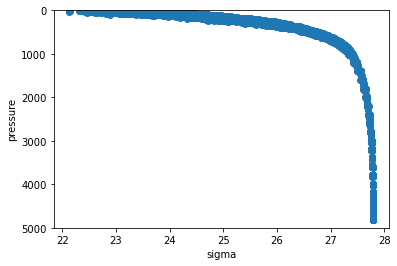

In [10]:
ds1.plot.scatter('sigma', 'pressure')
plt.ylim(5000,0)

Text(0.5, 1.0, 'nitrate')

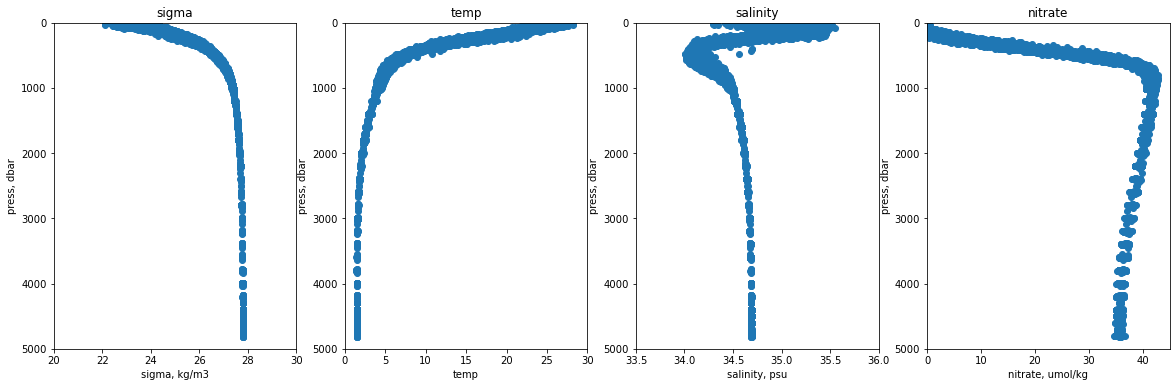

In [11]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(20, 6)

ax[0].scatter(ds1.sigma, ds1.pressure)
ax[0].set_ylim(5000,0)
ax[0].set_xlim(20, 30)
ax[0].set_ylabel('press, dbar')
ax[0].set_xlabel('sigma, kg/m3')
ax[0].set_title('sigma')

ax[1].scatter(ds1.temp, ds1.pressure)
ax[1].set_ylim(5000,0)
ax[1].set_xlim(0, 30)
ax[1].set_ylabel('press, dbar')
ax[1].set_xlabel('temp')
ax[1].set_title('temp')

ax[2].scatter(ds1.salinity, ds1.pressure)
ax[2].set_ylim(5000,0)
ax[2].set_xlim(33.5, 36)
ax[2].set_ylabel('press, dbar')
ax[2].set_xlabel('salinity, psu')
ax[2].set_title('salinity')

ax[3].scatter(ds1.nitrate, ds1.pressure)
ax[3].set_ylim(5000,0)
ax[3].set_xlim(0, 45)
ax[3].set_ylabel('press, dbar')
ax[3].set_xlabel('nitrate, umol/kg')
ax[3].set_title('nitrate')

In [12]:
# save to netCDF
ds1.to_netcdf('nitrate.nc')

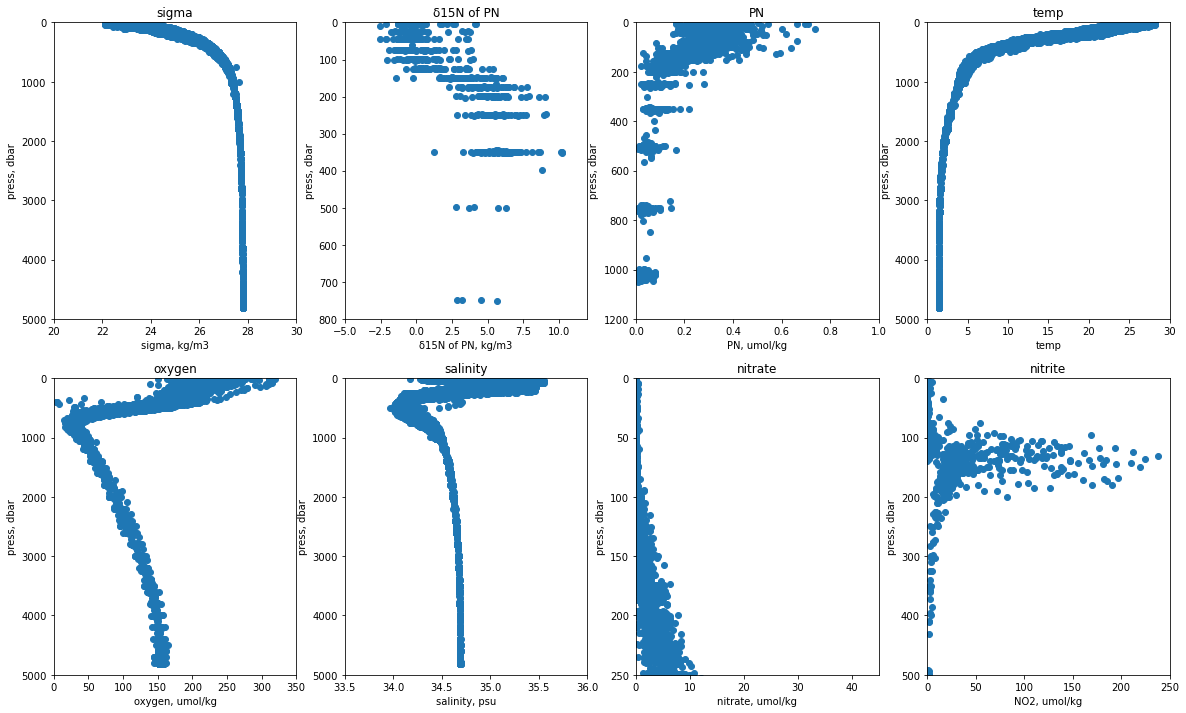

In [13]:
sub = da

fig, ax = plt.subplots(2, 4)
fig.set_size_inches(20, 12)

ax[0,0].scatter(sub.sigma, sub.press)
ax[0,0].set_ylim(5000,0)
ax[0,0].set_xlim(20, 30)
ax[0,0].set_ylabel('press, dbar')
ax[0,0].set_xlabel('sigma, kg/m3')
ax[0,0].set_title('sigma')

ax[0,1].scatter(sub.p15n, sub.press)
ax[0,1].set_ylim(800,0)
ax[0,1].set_xlim(-5, 12)
ax[0,1].set_ylabel('press, dbar')
ax[0,1].set_xlabel('δ15N of PN, kg/m3')
ax[0,1].set_title('δ15N of PN')

ax[0,2].scatter(sub.pn, sub.press)
ax[0,2].set_ylim(1200,0)
ax[0,2].set_xlim(0, 1)
ax[0,2].set_ylabel('press, dbar')
ax[0,2].set_xlabel('PN, umol/kg')
ax[0,2].set_title('PN')

ax[0,3].scatter(sub.temp, sub.press)
ax[0,3].set_ylim(5000,0)
ax[0,3].set_xlim(0, 30)
ax[0,3].set_ylabel('press, dbar')
ax[0,3].set_xlabel('temp')
ax[0,3].set_title('temp')

ax[1,0].scatter(sub.coxy, sub.press)
ax[1,0].set_ylim(5000,0)
ax[1,0].set_xlim(0, 350)
ax[1,0].set_ylabel('press, dbar')
ax[1,0].set_xlabel('oxygen, umol/kg')
ax[1,0].set_title('oxygen')

ax[1,1].scatter(sub.csal, sub.press)
ax[1,1].set_ylim(5000,0)
ax[1,1].set_xlim(33.5, 36)
ax[1,1].set_ylabel('press, dbar')
ax[1,1].set_xlabel('salinity, psu')
ax[1,1].set_title('salinity')

ax[1,2].scatter(sub.nit, sub.press)
ax[1,2].set_ylim(250,0)
ax[1,2].set_xlim(0, 45)
ax[1,2].set_ylabel('press, dbar')
ax[1,2].set_xlabel('nitrate, umol/kg')
ax[1,2].set_title('nitrate')

ax[1,3].scatter(sub.no2, sub.press)
ax[1,3].set_ylim(500,0)
ax[1,3].set_xlim(0, 250)
ax[1,3].set_ylabel('press, dbar')
ax[1,3].set_xlabel('NO2, umol/kg')
ax[1,3].set_title('nitrite');

plt.savefig('plots.png',
           dpi=200,
           bbox_inches='tight',
           transparent=True,
           )

In [17]:
# N:P ratios
n2p = np.zeros(1000)

for i in range(1000):
    n2p[i] = da.nit.values[i]/da.phos.values[i]

Text(0, 0.5, 'pressure, dbar')

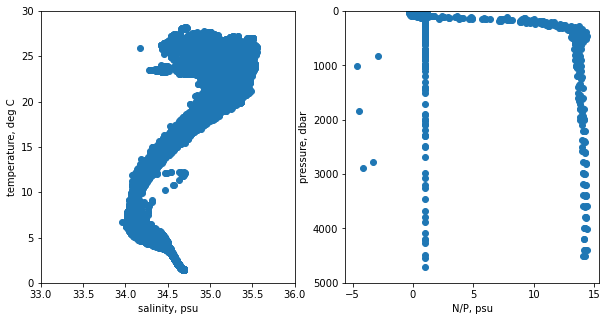

In [18]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax[0].scatter(da.csal, da.temp)
ax[0].set_xlim(33,36)
ax[0].set_ylim(0, 30)
ax[0].set_xlabel('salinity, psu')
ax[0].set_ylabel('temperature, deg C')

ax[1].scatter(n2p, da.press.values[:1000])
#ax[1].set_xlim(33,36)
ax[1].set_ylim(5000,0)
ax[1].set_xlabel('N/P, psu')
ax[1].set_ylabel('pressure, dbar')

In [69]:
np.unique(da.cast)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])